## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv('College_Data') 

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA

## Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. 

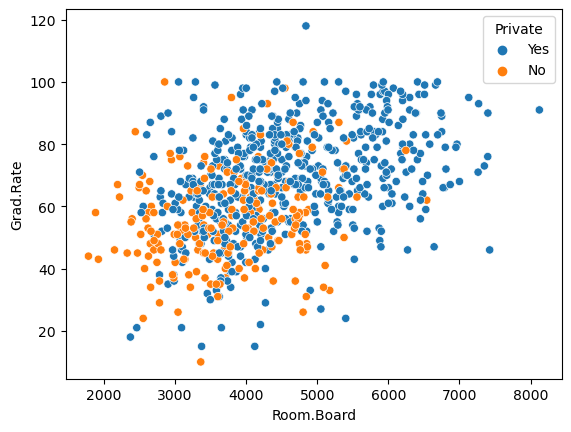

In [6]:
sns.scatterplot(data= df, x="Room.Board", y="Grad.Rate", hue="Private")
plt.show()

## Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

AttributeError: 'PathCollection' object has no property 'aspect'

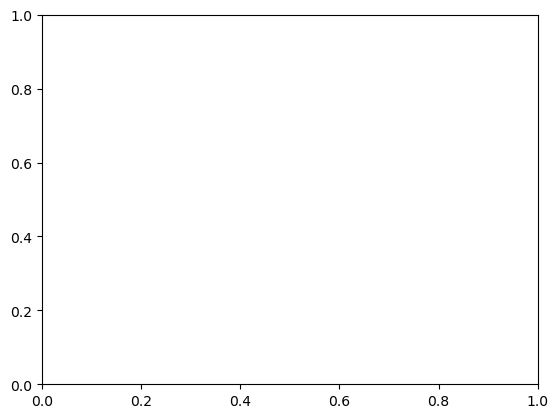

In [7]:
sns.scatterplot(data= df, x="Outstate", y="F.Undergrad", hue="Private")
plt.show()

## Use sns.FacetGrid to create a stacked histogram showing Out of State Tuition based on the Private column. 

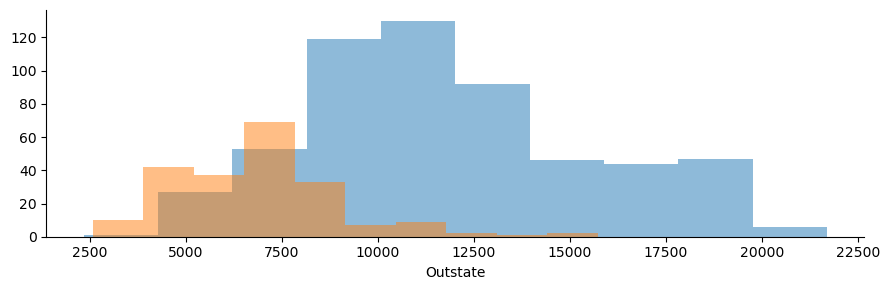

In [8]:
# g = sns.FacetGrid(df)
# g.map(sns.histplot, 'Outstate', 'Private', alpha=0.5);
g =sns.FacetGrid(df,hue="Private",aspect=3)
g = g.map(plt.hist,'Outstate',alpha=0.5)

## Use sns.FacetGrid to create a stacked histogram showing Grad.Rate based on the Private column. 

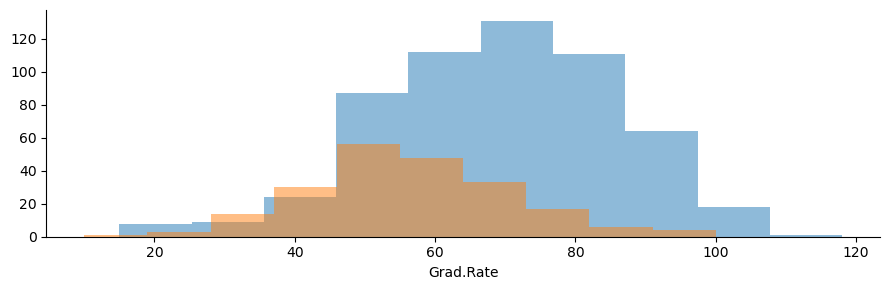

In [9]:
g =sns.FacetGrid(df,hue="Private",aspect=3)
g = g.map(plt.hist,'Grad.Rate',alpha=0.5)

## Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [10]:
df1 = df[df["Grad.Rate"]>100]
df1

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


## Set that school's graduation rate to 100 then re-do the histogram visualization.

In [11]:
df2 = df[df["Grad.Rate"]==100]
df2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
College of Mount St. Joseph,Yes,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
Grove City College,Yes,2491,1110,573,57,88,2213,35,5224,3048,525,350,65,65,18.4,18,4957,100
Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100
Lindenwood College,Yes,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
Santa Clara University,Yes,4019,2779,888,40,73,3891,128,13584,5928,630,1278,88,92,13.9,19,10872,100
Siena College,Yes,2961,1932,628,24,68,2669,616,10800,5100,575,1090,71,82,14.1,42,8189,100
University of Richmond,Yes,5892,2718,756,46,72,2854,594,14500,3285,700,1125,75,89,11.7,32,11984,100


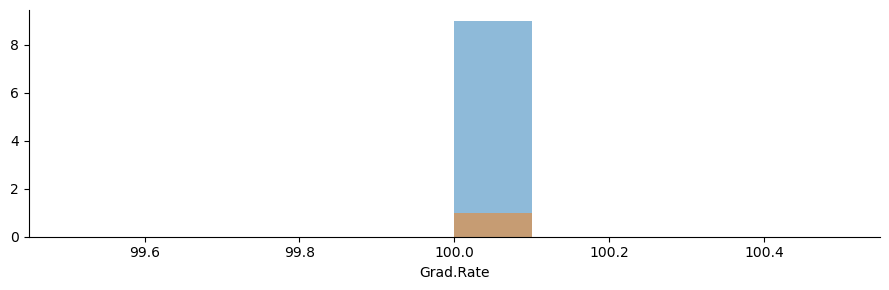

In [12]:
g =sns.FacetGrid(df2,hue="Private",aspect=3)
g = g.map(plt.hist,'Grad.Rate',alpha=0.5)

## K Means Model

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=2)

## Fit the model to all the data except for the Private label.

In [15]:
X = df.drop('Private',axis=1)
y = df['Private']
kmeans.fit(X)

KMeans(n_clusters=2)

## What are the cluster center vectors?

In [16]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

In [17]:


for i in df['Private']:
    if i == "Yes":
        df["cluster"]= 1
    else:
         df["cluster"]= 0
            
df.head() 

   

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


## Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [18]:
prediction = kmeans.fit_predict(X)
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(df['cluster'],prediction))

[[  0   0]
 [669 108]]


In [ ]:
print(classification_report(df['Cluster'],prediction))